# FAIKR Module 3 Project

*Group members*:
- Ciapponi Stefano (mat. 0001030211)
- Cortecchia Tommaso (mat. 0001054600)

## Aims of the Project:

1. Create a **Pipeline** which is able to handle Bayesian Network creation starting from **any Dataset**.
2. Build a **Bayesian Network Model** starting from a Dataset downloaded from Kaggle
3. Test the Network through queries inspired by the module's content.


**Library imports:**

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display

## The Dataset
<a href="https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey"> Dataset Link </a>: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey

The chosen dataset contains results from a survey Taken by the <a href="https://stackoverflow.com/"> Stack Overflow Community</a> in the year 2018.

The Survey originally covered numerous different topics concearning the ICT world, but we were mostly interested in **Data regarding the user profiles**.
 
So we decided to apply some pre-processing to reduce the number of variables, but also to simplify the dataset so that the Bayesian Model built from it would become more manageable and readable.


In [43]:
%%capture
#Supresses stderr about Mixed-Type Data
df = pd.read_csv('dataset/survey_results_public.csv', sep=',')

In [44]:
display(df.describe())

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


## Chosen Attributes

Most of the Dataset attributes consisted in **answers to open question** which would have been hard to manage and also contained mixed-type data.

Among the user's information the following attributes have been chosen:

- ***Hobby***: *True if the user considers Coding a Hobby.*
- ***OpenSource***: *True if the user considers itself an OpenSource supporter*
- ***Country***: *The user's Country of origin*
- ***Employment***: *The user's employement type (Full-Time Part-Time...)*
- ***Education***: *The user's Formal Education (e.g., Bachelor, Master's Degree, etc.)*
- ***Undergrad Major***: *The user's major during it's Undergraduate studies*
- ***Job Satisfaction***: *A score between 1 and 7 representing the user's Jobs Satisfaction*
- ***Salary***: *The user's Salary Converted in USD*

In [45]:
columns=['Hobby','OpenSource','Country','Employment',\
    'FormalEducation','UndergradMajor','JobSatisfaction','ConvertedSalary']

data=df.get(columns).dropna()


data = data.rename(columns={'FormalEducation':'Education', 'ConvertedSalary':'Salary'})
data.head()

,Hobby,OpenSource,Country,Employment,Education,UndergradMajor,JobSatisfaction,Salary
1,Yes,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Moderately dissatisfied,70841.0
4,Yes,No,South Africa,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,21426.0
5,Yes,No,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Moderately satisfied,41671.0
6,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,120000.0
8,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Moderately satisfied,250000.0


The ***JobSatisfaction*** values have been remapped into an integer scale.

In [46]:
js_dict = {
    'Extremely dissatisfied':0,
    'Moderately dissatisfied':1,
    'Slightly dissatisfied':2,
    'Neither satisfied nor dissatisfied':3,
    'Slightly satisfied':4,
    'Moderately satisfied':5,
    'Extremely satisfied':6,
}

data['JobSatisfaction']=data['JobSatisfaction'].map(js_dict)

The Dataset has been pruned from entries which had a ***Formal Education*** different from a *Bachelor's Degree, a Master's Degree or a Ph.D* to **reduce the complexity** of the Model.

In [47]:
data = data.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)',"Bachelor")
data = data.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)',"Master")
data = data.replace('Other doctoral degree (Ph.D, Ed.D., etc.)',"Ph.D")
data = data[data['Education'].isin(['Bachelor','Master','Ph.D'])]

We considered data concerning only the **three most represented countries** in the Dataset.

In [48]:
countries=data.groupby('Country').size().sort_values()[-3:].index.tolist()
data = data[data['Country'].isin(countries)]

The ***Converted Salary*** attribute has been discretized into three ranges to reduce the Dataset Complexity and to Work on **Categorical Values**.

<AxesSubplot:>

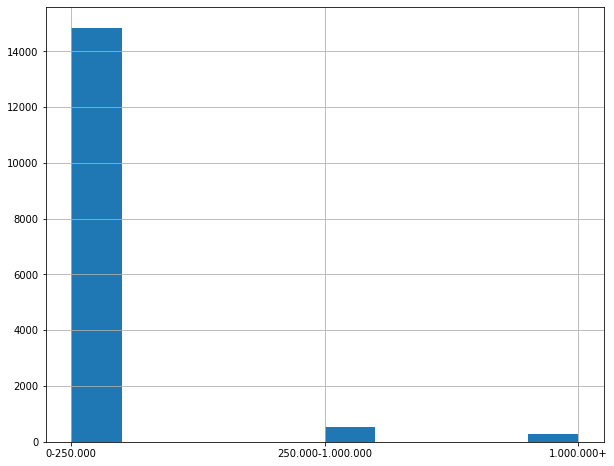

In [49]:
plt.figure(figsize=(10,8))
data.Salary=data.Salary.map(lambda x: '0-250.000' if x<=250000 else '250.000-1.000.000' if x<=1000000 else '1.000.000+')
data.Salary.hist()


The ***Undergrad Major*** Attribute has been Binarized into "STEM" and "NON STEM" majors.

In [50]:
stem=['A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Web development or web design',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 'Mathematics or statistics',
 'Information systems, information technology, or system administration',
]

not_stem=[ 'A social science (ex. anthropology, psychology, political science)',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A business discipline (ex. accounting, finance, marketing)',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'A health science (ex. nursing, pharmacy, radiology)',
]

data=data[data['UndergradMajor'].isin(stem+not_stem)]
data.UndergradMajor=data.UndergradMajor.map(lambda x: 'STEM' if x in stem else 'NOT_STEM')

### Content of the Dataset after applying pre-processing:

In [51]:
display(data.head())

,Hobby,OpenSource,Country,Employment,Education,UndergradMajor,JobSatisfaction,Salary
1,Yes,Yes,United Kingdom,Employed full-time,Bachelor,STEM,1,0-250.000
5,Yes,No,United Kingdom,Employed full-time,Bachelor,STEM,5,0-250.000
22,No,No,United Kingdom,Employed full-time,Bachelor,STEM,4,0-250.000
24,Yes,No,India,Employed full-time,Master,STEM,5,0-250.000
27,No,No,United States,Employed full-time,Bachelor,NOT_STEM,5,250.000-1.000.000


In [52]:
for col in data.columns:
    
    print(col, ":", data[col].unique())

Hobby : ['Yes' 'No']
OpenSource : ['Yes' 'No']
Country : ['United Kingdom' 'India' 'United States']
Employment : ['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
Education : ['Bachelor' 'Master' 'Ph.D']
UndergradMajor : ['STEM' 'NOT_STEM']
JobSatisfaction : [1 5 4 0 6 2 3]
Salary : ['0-250.000' '250.000-1.000.000' '1.000.000+']


## Bayesian Network Creation

We decided to test the Dataset Attribute independence through a $Chi^2 Test$ since we are working with Categorical Values.

Each attribute's indipendence has been tested with all the others and a Contingency matrix has been Created. 

*Function that computes Tests on all the Dataset Attributes independences and creates a Contingency matrix*:

- For Readability We decided to set all the the test outpus to 1 if their p values are greater or equal to $\alpha$.

### Chi-Square Test:

The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not.

A test of independence assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other.

The test Consists in the following steps:

1. Defining an Hypothesis:
     - `Null Hypothesis (H0)`: Two variables are independent.
     - `Alternate Hypothesis (H1)`: Two variables are not independent.
2. Calculating a **Contingency Table** for both Attributes tested:
     - Table showing the distribution of one variable in rows and another in columns.
3. Find the Expected Value
     - $A$ and $B$ are independent iff $P(A \cap B)=P(A)* P(B)$
4. Calculate the $p-value$:
     - $\chi^2=\Sigma\frac{(O_i-E_i)^2}{E_i}$
     - Where:
       - $E_i$ is the expected value computed in the previous step.
       - $O_i$ is the number of observations of type $i$
5. Accept or Reject The Hypothesis:
     - Decide $\alpha$ = Significance level of the Test
     - if: $p-value>\alpha$ `H0` is accepted.
     - Otherwise: `H1` is accepted


In [53]:
def chi2_contingency_mat(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat=np.zeros((s,s))
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[a][b]=p
            b=b+1
        a = a+1
        b=0
    if alpha:
        mat[mat>=alpha]=1
        mat[mat<alpha]=0
    return mat


$Chi^2$ Contingency matrix plot:

- $\alpha$ has been set to $5\times 10^{-7}$ to take in consideration only **Highly Dependent** attributes and take less risk in misjudging the results.

<AxesSubplot:>

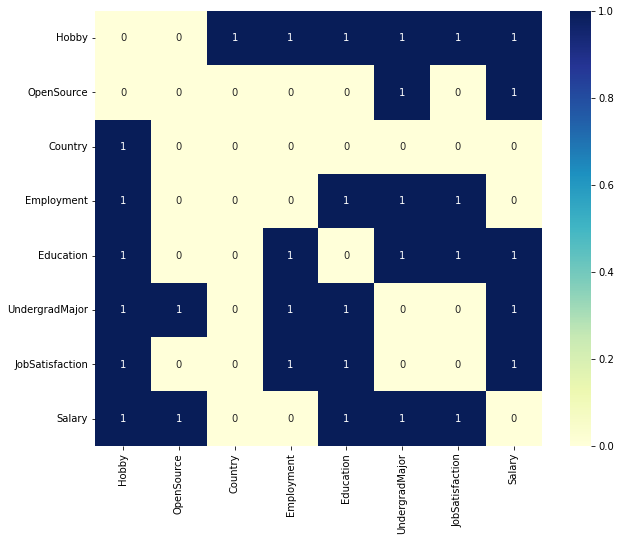

In [54]:
chi2Mat=chi2_contingency_mat(data,5e-7)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

As we can see the *Employment* column could make the **BN** too complicated and also doesn't really seem signicative enough, so we decided to drop it and recompute the Contingency matrix.

<AxesSubplot:>

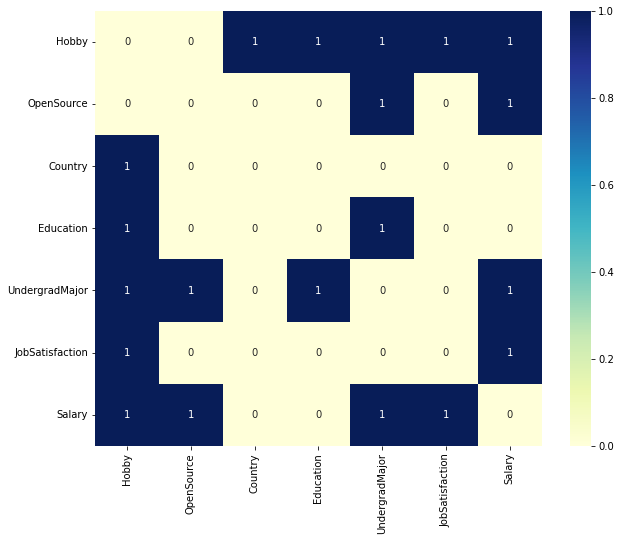

In [55]:
data = data.drop('Employment', axis=1)
chi2Mat=chi2_contingency_mat(data,5e-3)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

## Graph Plotting

- Function used to Compute a Graph Table starting from a computed $\chi^2$ matrix.

In [56]:
def compute_graph_table(data, chi2Mat):

    graph_table = pd.DataFrame()


    source = []
    target=[]

    a=1
    for i in range(data.columns.size):
        for j in range(a, data.columns.size):
            if chi2Mat[i][j]==0:
                source.append(data.columns[i])
                target.append(data.columns[j])
        a=a+1

    type=['Unidirected' for i in range(len(source))]
    weight=[None for i in range(len(source))]
    graph_table['Source']=source
    graph_table['Target']=target
    graph_table['Type']=type
    graph_table['weight']=weight
    return graph_table


Computed Graph Table:

In [57]:
graph_table = compute_graph_table(data, chi2Mat)
graph_table

,Source,Target,Type,weight
0,Hobby,OpenSource,Unidirected,None
1,OpenSource,Country,Unidirected,None
2,OpenSource,Education,Unidirected,None
3,OpenSource,JobSatisfaction,Unidirected,None
4,Country,Education,Unidirected,None
5,Country,UndergradMajor,Unidirected,None
6,Country,JobSatisfaction,Unidirected,None
7,Country,Salary,Unidirected,None
8,Education,JobSatisfaction,Unidirected,None
9,Education,Salary,Unidirected,None


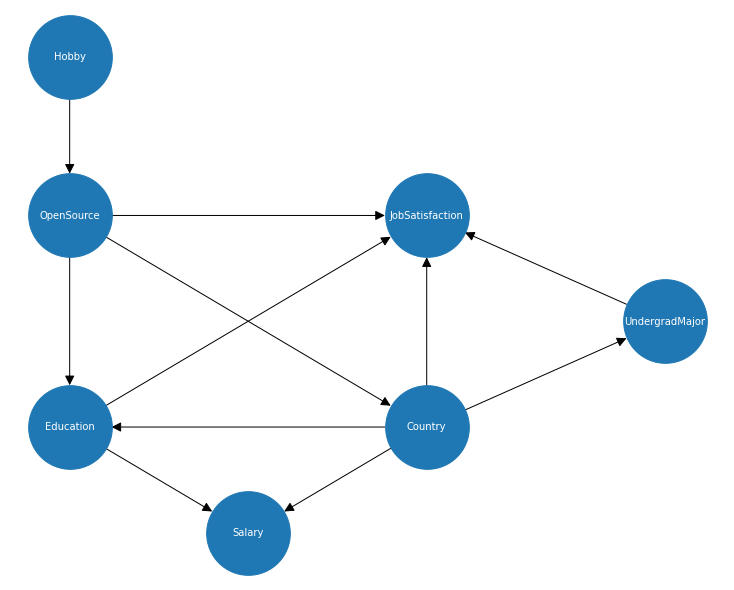

In [58]:
import networkx as nx

G = nx.from_pandas_edgelist(graph_table, source='Source', target='Target',create_using=nx.DiGraph())
pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'Education':(0.5,3),
     'Country':(2,3),
     'Salary':(1.25,1),
     'UndergradMajor':(3,5)
 }
plt.figure(figsize=(10,8))

nx.draw(G, arrows=True, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')
# print(G.edges())

## Markov Blanket Plotting

- Function to compute a Markov Blanked given a Graph and a Node.
- Function that Plots the Markov Blanket of a Node:
  - **Red**: Node We are Interested in.
  - **Green**: Markov Blanket Set of Nodes.
  - **Blue**: Set of nodes which are not part of the Markov Blanket.  

In [59]:
#Function to extract the Markov Blanket of a Node from the Graph
def get_mb(graph, node):
    mb = set()
    parents = [i for i in graph.predecessors(node)]
    mb.update(parents)
    sons = [i for i in graph.successors(node)]
    mb.update(sons)
    sons_parents=[]
    for s in sons:
        sons_parents.extend([i for i in graph.predecessors(s) if i != node])

    mb.update(sons_parents)
    return mb

#Markov Blanket Plotting Function
def plot_mb(G, mb, node):
    pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'Education':(0.5,3),
     'Country':(2,3),
     'Salary':(1.25,1),
     'UndergradMajor':(3,5)
    }
    plt.figure(figsize=(10,8))
    color_map=[]
    for n in G:
        if n in mb:
            color_map.append('green')
        elif n == node:
            color_map.append('red')
        else: 
            color_map.append('blue') 
    nx.draw(G, arrows=True,node_color=color_map, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')

*Markov Blanket of the OpenSource Node*

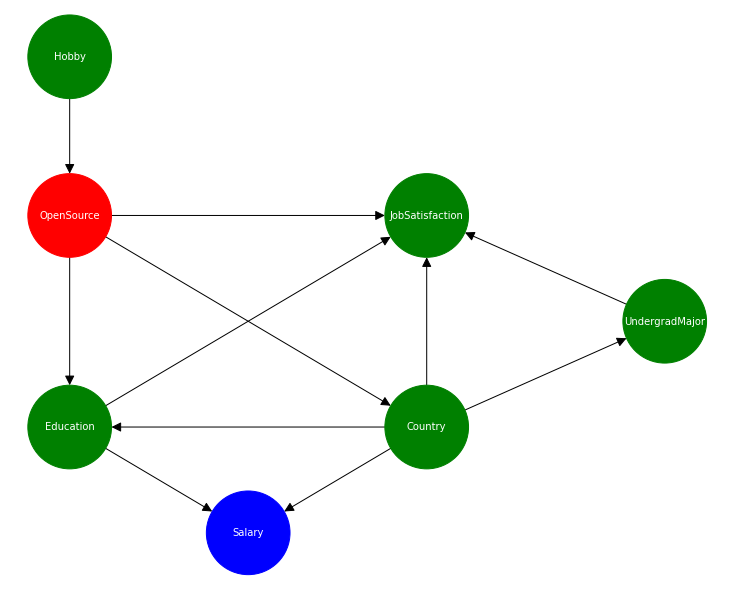

In [60]:
mb=get_mb(G, 'OpenSource')
plot_mb(G, mb, 'OpenSource')

plt.show()

## Bayesian Network Model (PGMPY library)

This function computes the Graph Edges using the Upper triangular part of the $\chi^2$ matrix as an adjacency Table.

In [61]:
def getEdges(mat,names=[]):
    result=[]
    l,_=mat.shape
    for i in range(l): 
        for j in range(i+1,l):
            if mat[i,j]==0:
                if len(names)>0:
                    result.append((names[i],names[j]))
                else: result.append((i,j))
    return result    

### Maximum likelihood
Model Creation using a **Maximum Likelihood Estimator** to compute the Probability Tables.

- **Maximum likelihood estimation (MLE)** is a method of estimating the parameters of an assumed probability distribution, given some observed data. 
 
- This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.

Given the **Likelihood** of a function:

$L_n(\theta)=L_n(\theta; y) = f_n(y;\theta)$

where $y =  \{ y_1, y_2,...\}$ is a set of random variables.

**MLE** aims at maximizing $\hat{\theta}$ using the following formula:

$\hat{\theta} = arg_{\theta \in \Theta} max \hat{L_n}(\theta;y)$



In [62]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

edges=getEdges(chi2Mat,names=data.columns)
model= BayesianNetwork(edges)
model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)


+------------+----------+
| Hobby(No)  | 0.199923 |
+------------+----------+
| Hobby(Yes) | 0.800077 |
+------------+----------+
+-----------------+--------------------+---------------------+
| Hobby           | Hobby(No)          | Hobby(Yes)          |
+-----------------+--------------------+---------------------+
| OpenSource(No)  | 0.7966101694915254 | 0.49800223749400674 |
+-----------------+--------------------+---------------------+
| OpenSource(Yes) | 0.2033898305084746 | 0.5019977625059933  |
+-----------------+--------------------+---------------------+
+-------------------------+---------------------+---------------------+
| OpenSource              | OpenSource(No)      | OpenSource(Yes)     |
+-------------------------+---------------------+---------------------+
| Country(India)          | 0.20440215522182736 | 0.24486845909222318 |
+-------------------------+---------------------+---------------------+
| Country(United Kingdom) | 0.17872291642783447 | 0.16536571263370917

### Model Independencies

In [63]:
model.get_independencies()

(Education ⟂ Hobby | OpenSource)
(Education ⟂ UndergradMajor | Country)
(Education ⟂ Hobby | OpenSource, JobSatisfaction)
(Education ⟂ Hobby | OpenSource, UndergradMajor)
(Education ⟂ Hobby | OpenSource, Salary)
(Education ⟂ Hobby, UndergradMajor | OpenSource, Country)
(Education ⟂ UndergradMajor | Hobby, Country)
(Education ⟂ UndergradMajor | Salary, Country)
(Education ⟂ UndergradMajor | OpenSource, Hobby, Country)
(Education ⟂ Hobby | OpenSource, JobSatisfaction, UndergradMajor)
(Education ⟂ Hobby | OpenSource, Salary, JobSatisfaction)
(Education ⟂ Hobby | OpenSource, JobSatisfaction, Country)
(Education ⟂ Hobby | OpenSource, Salary, UndergradMajor)
(Education ⟂ Hobby | OpenSource, Country, UndergradMajor)
(Education ⟂ Hobby, UndergradMajor | OpenSource, Salary, Country)
(Education ⟂ UndergradMajor | Salary, Hobby, Country)
(Education ⟂ UndergradMajor | OpenSource, Salary, Hobby, Country)
(Education ⟂ Hobby | OpenSource, Salary, JobSatisfaction, UndergradMajor)
(Education ⟂ Hobby | 

## Flows of probabilistic influence
**Definition (active two-edge trail):**
If influence can flow from X to Y via Z, the trail X $\rightleftharpoons$ Z $\rightleftharpoons$ Y is active.

For influence to flow from nodes $X_1$ to $X_n$, it needs to flow through every single
node on the trail. 
This is true if and only if every two-edge trail $X_{i−1}\rightleftharpoons X_i \rightleftharpoons X_{i+1}$ along
the trail allows influence to flow.

**Definition (active trail):**  let $Z$ be a subset of observed variables.
The trail $X_{i−1} \rightleftharpoons X_i \rightleftharpoons X_{i+1}$ is active given $Z$ if
- $\forall X_{i−1} \rightarrow X_i \leftarrow X_{i+1}$, $X_i$ or one of its descendants are in $Z$
- no other node along the trail is in $Z$


In [64]:
print(model.active_trail_nodes(['JobSatisfaction'])['JobSatisfaction'])
print(model.active_trail_nodes(['JobSatisfaction'],['OpenSource'])['JobSatisfaction'])

{'Education', 'OpenSource', 'JobSatisfaction', 'Hobby', 'Country', 'UndergradMajor', 'Salary'}
{'Education', 'JobSatisfaction', 'Country', 'UndergradMajor', 'Salary'}


You can see how the presence of *OpenSource* in the evidence 'blocks' the trail between *JobSatisfaction* and *Hobby*.

## Markov Blanket Notes
All information about a random variable in a **Bayesian network** is contained within this set of nodes (parents, children, and parents of children). 

If we observe all of these variables (giving an **evidence**), then our node is independent of all other nodes within the network.

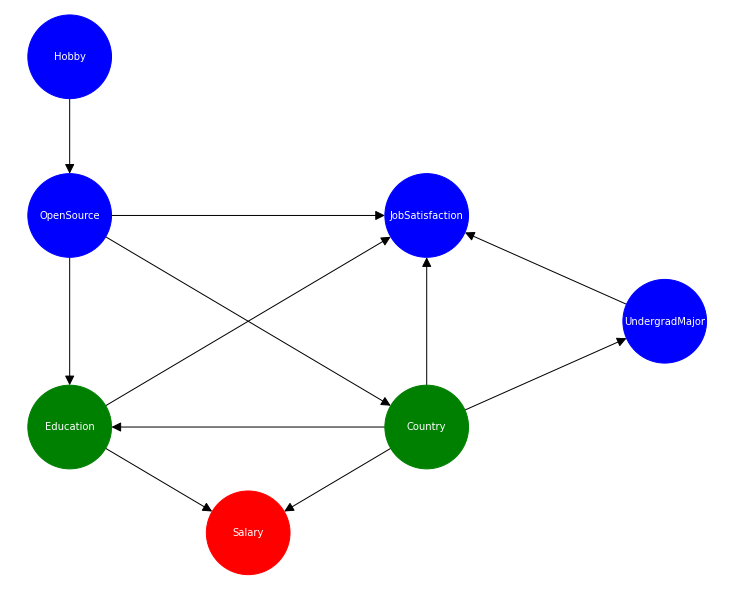

In [65]:
plot_mb(G, model.get_markov_blanket('Salary'), 'Salary')

As we can see asking the BN the probability of having a certain *Salary* given its **Markov Blanket** is the same as adding evidence to other nodes that aren't part of it.

This means that ***Salary*** is independent to other nodes given its **Markov Blanket**.

## Variable Elimination
**Variable Elimination** is an exact inference algorithm which consists in
computing a probability by repeatedly applying two basic factor operations: product and marginalization.

- In a Bayesian network, a *factor* correspond to a conditional probability distribution.

- **Pointwise product** of factors $f_1$ and $f_2$ :
$$f_1(x_1,..,x_j,y_1,..,y_k)\times f_2(y_1,..,y_k,z_1,..,z_l)=f(x_1,..,x_j,y_1,..,y_k,z_1,..,z_l)$$

- **Summing out** a variable from a product of factors:
  1. move any constant factors outside the summation
  2. add up submatrices in pointwise product of remaining factors
$$\begin{align*}
    \sum_{X} f_1\times...\times f_k=&f_1\times...\times f_i\sum_{X} f_{i+1}\times...\times f_k\\ 
    =&f_1\times...\times f_i\times f_{\bar{X}}
\end{align*}$$

The VE algorithm loops over the variables of the network and eliminates them following an ordering $O$. For each varibale $X_i$ (ordered according to 
$O$):
1. multiply all factors $\phi_i$ containing $X_i$
2. sum out $X_i$ to obtain a new factor $\tau$
3. replace the factors $\phi_i$ with $\tau$

**Any** ordering yields a valid algorithm. However, different orderings may **drammatically alter the running time of the VE algorithm**, and the search for the best ordering is a **NP_hard**  problem. 

Now we will show two different queries made on the BN putting in evidence what an **irrelevant variable** is. A variable is irrelevant to the query if the **sum over it is equal to 1**.

 ***Th.*** $Y$ is irrelevant if **d-separated** from $X$ by $E$.

In the previous picture, we have shown the Markov Blanket of *Salary*, which is formed by its ancestors *Country* and *Education*. Now we'll make two different queries:
- *P(Salary|Country='India',Education='Bachelor')*
- *P(Salary|Country='India',Education='Bachelor',OpenSource='Yes')*

And we are expecting the outcomes to be equal, since *OpenSource* is d-separated from *Salary* by *Country* and *Education*, thus irrelevant to the query.

In [66]:
%%capture
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

pSalary1 = inference.query(['Salary'],{'Country':'India','Education':'Bachelor'})

pSalary2 = inference.query(['Salary'],{'Country':'India','Education':'Bachelor','OpenSource':'Yes'})


In [67]:
print("P(Salary | Country=India, Education=Bachelor)")
print(pSalary1)
print("\nP(Salary | Country=India, Education=Bachelor, OpenSource=Yes)")
print(pSalary2)

P(Salary | Country=India, Education=Bachelor)
+---------------------------+---------------+
| Salary                    |   phi(Salary) |
+===========================+===============+
| Salary(0-250.000)         |        0.9836 |
+---------------------------+---------------+
| Salary(1.000.000+)        |        0.0008 |
+---------------------------+---------------+
| Salary(250.000-1.000.000) |        0.0156 |
+---------------------------+---------------+

P(Salary | Country=India, Education=Bachelor, OpenSource=Yes)
+---------------------------+---------------+
| Salary                    |   phi(Salary) |
+===========================+===============+
| Salary(0-250.000)         |        0.9836 |
+---------------------------+---------------+
| Salary(1.000.000+)        |        0.0008 |
+---------------------------+---------------+
| Salary(250.000-1.000.000) |        0.0156 |
+---------------------------+---------------+


As expected, the two CPDs are **exactly the same**.

## Comparison between Exact and Approximate Methods

We wil now make a comparison between Exact Inference Methods and Approximate Inference ones. 

First of all, we define a function that, given in input our model, an evidence, a sample size and the exact probabilities (computed using *Variable Elimination*), returns as results probabilities and absolutes error w.r.t. the exact computed on the samples obtained from two different sampling methods: 
- **Rejection Sampling:** randomly generates samples rejecting the ones where the evidence is false
- **Likelihood Weighting:** in addition to every sample, produces a weight representing the probability that a sample would not be rejected




        

In [68]:
# Now switch to sampling methods
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling

def run_experiment(model,sample_size,evidence,p_exact):
    # Sample
    def prob_LW(samples,variable):
        result={}
        values=samples[variable].unique()
        for value in values:
            result[value]=round(np.sum(samples[samples[variable]==value]['_weight'])/np.sum(samples['_weight']),2)
        return result

    def prob_RS(samples,variable):
        result={}
        values=samples[variable].unique()
        tot=len(samples[variable])
        for value in values:
            result[value]=len(samples[samples[variable]==value])/tot
        return result

    def absolute_error(exact_value,approx_value):
        return np.absolute(exact_value-approx_value)

    evidence2 = [State(key,val) for key,val in evidence.items()]
    inference_sampling=BayesianModelSampling(model)
    samples_LW = inference_sampling.likelihood_weighted_sample(evidence = evidence2, size=sample_size)
    samples_RS = inference_sampling.rejection_sample(evidence=evidence2, size=sample_size)
    
    ## Statistics  
    variables=[str(node) for node in model.nodes if str(node) not in evidence.keys()]
    p_LW={}
    p_RS={}
    absolute_error_LW={}
    absolute_error_RS={}
    
    for variable in variables:

        p_LW[variable]=prob_LW(samples_LW,variable)
        p_RS[variable]=prob_RS(samples_RS,variable)
        
        values=samples_LW[variable].unique()
        # exec('absolute_error_LW[variable]={value:absolute_error(p_exact[variable].get_value(%s=value),p_LW[variable][value]) for value in values}'%variable,locals())
        absolute_error_LW[variable]={value:absolute_error(p_exact[variable].get_value(**{variable:value}),p_LW[variable][value]) for value in values}
        
        values=samples_RS[variable].unique()
        # exec('absolute_error_RS[variable]={value:absolute_error(p_exact[variable].get_value(%s=value),p_RS[variable][value]) for value in values}'%variable,locals())
        absolute_error_RS[variable]={value:absolute_error(p_exact[variable].get_value(**{variable:value}),p_RS[variable][value]) for value in values}

    # Return results
    return p_LW,p_RS,absolute_error_LW,absolute_error_RS

Then we run a number of experiments using an increasing sample size.

In [69]:
%%capture
evidence = {'Country':'India','Education':'Bachelor'}
starting_size_=1 # from 10 sample points
final_size=5     # to 10^5 sample points
experiments=20 # 8 experiments
result=[]
inference_exact=VariableElimination(model)

variables=[str(node) for node in model.nodes if str(node) not in evidence.keys()]
p_exact={variable:inference_exact.query([variable],evidence) for variable in variables}

for size in np.logspace(starting_size_, final_size, num=experiments, dtype='<i8'):
    p_LW,p_RS,absolute_error_LW,absolute_error_RS=run_experiment(model,size,evidence,p_exact)
    result.append({
        'sample_size':size,
        'p_exact':p_exact,
        'p_LW':p_LW,
        'p_RS':p_RS,
        'e_LW':absolute_error_LW,
        'e_RS':absolute_error_RS
    })

These two function simply plot respectively the probability and the error wrt the exact probability for a given variable assuming a certain value.    

In [70]:
def plot_prob(results,p_exact,evidence,**variables):

    sample_size=[r['sample_size'] for r in results]
    
    for var,val in variables.items():
        p_LW=[r['p_LW'][var][val] for r in results]
        p_RS=[r['p_RS'][var][val] for r in results]
        p=p_exact[var].get_value(**{var:val})

        plt.figure(figsize=(20,5))
        plt.subplot()
        plt.ylim(0,1)
        plt.title('P({}={}|{}'.format(var,val,','.join([str(k)+"="+str(v) for k,v in evidence.items()])))
        LWCplot, = plt.semilogx(sample_size,p_LW,'b',label="Likelihood Weighting")
        RSCplot, = plt.semilogx(sample_size,p_RS,'g',label="Rejection Sampling")
        VECplot, = plt.semilogx(sample_size,p*np.ones(len(results)),'r',label="reference value")
        plt.legend(handles=[LWCplot,RSCplot,VECplot])
        plt.show()

def plot_error(results,evidence,**variables):
    # evidence=p_exact['Hobby'].get_evidence()
    # print(evidence)
    sample_size=[r['sample_size'] for r in results]
    
    for var,val in variables.items():
        e_LW=[r['e_LW'][var][val] for r in results]
        e_RS=[r['e_RS'][var][val] for r in results]

        plt.figure(figsize=(20,5))
        plt.subplot()
        plt.ylim(0,np.max(e_LW+e_RS)+0.1*np.max(e_LW+e_RS))
        plt.title('Absolute error on P({}={}|{}'.format(var,val,','.join([str(k)+"="+str(v) for k,v in evidence.items()])))
        LWCplot, = plt.semilogx(sample_size,e_LW,'b',label="Likelihood Weighting")
        RSCplot, = plt.semilogx(sample_size,e_RS,'g',label="Rejection Sampling")
        plt.legend(handles=[LWCplot,RSCplot])
        plt.show()


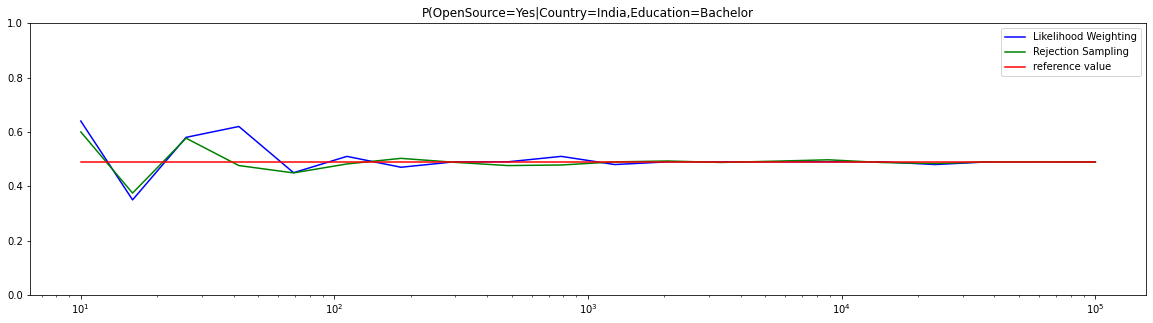

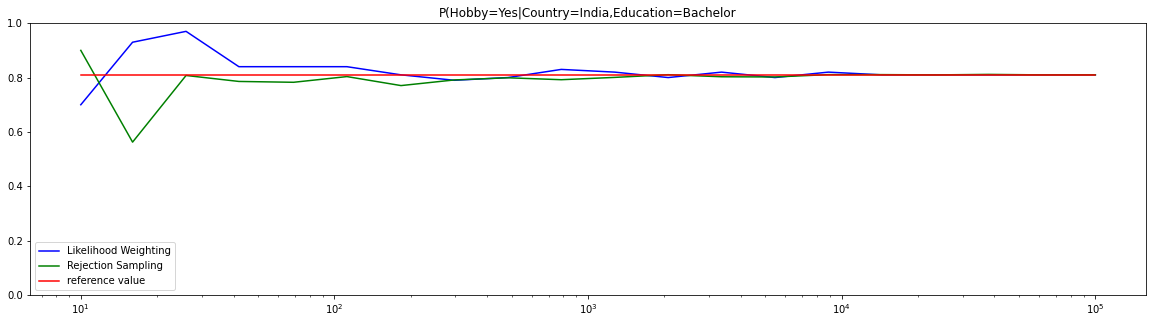

In [71]:
plot_prob(result,p_exact,evidence,OpenSource='Yes',Hobby='Yes')

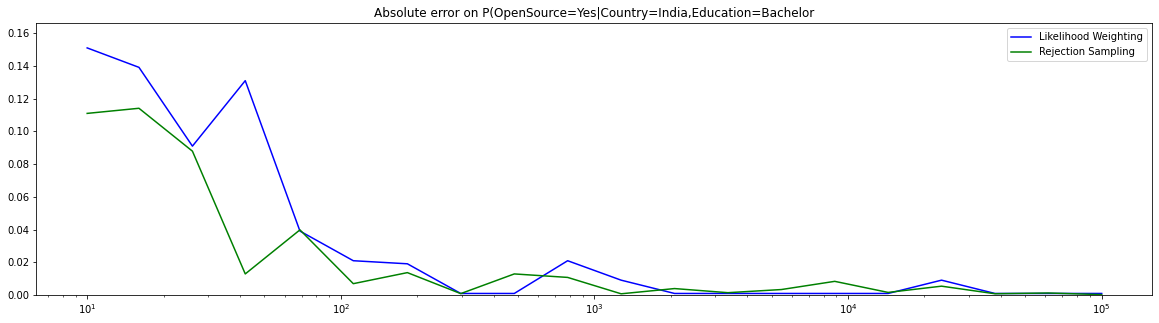

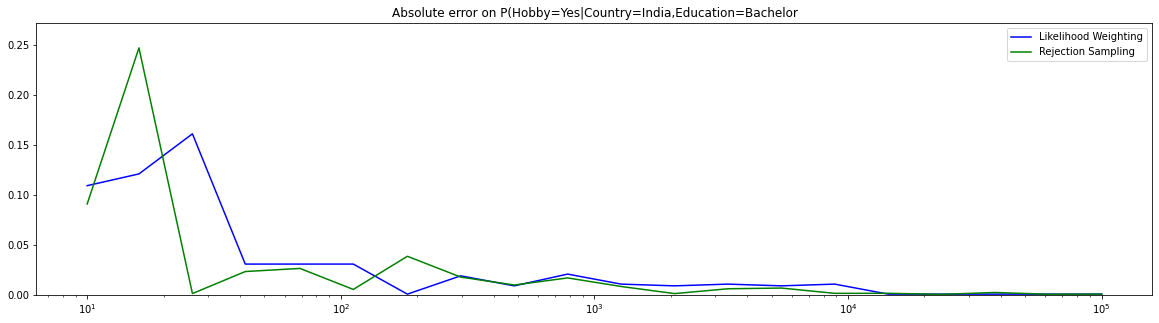

In [72]:
plot_error(result,evidence,OpenSource='Yes',Hobby='Yes')

As expected, as the sample size increases, the accuracy of the probability computed using sampling methods approximate the exact one.

## Final Considerations

### To conclude we'll show some Interesting Queries that can be formulated using the BN we built.
*Given a **Country** what's the probability of having a **NON-STEM Degree**?*

In [73]:
# %%capture

for country in ['India', 'United Kingdom', 'United States']:
    
    p_country_um = inference.query(['UndergradMajor'], {'Country':country})
    print(country)
    print(p_country_um)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


India
+--------------------------+-----------------------+
| UndergradMajor           |   phi(UndergradMajor) |
+==========================+=======================+
| UndergradMajor(NOT_STEM) |                0.0129 |
+--------------------------+-----------------------+
| UndergradMajor(STEM)     |                0.9871 |
+--------------------------+-----------------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


United Kingdom
+--------------------------+-----------------------+
| UndergradMajor           |   phi(UndergradMajor) |
+==========================+=======================+
| UndergradMajor(NOT_STEM) |                0.0844 |
+--------------------------+-----------------------+
| UndergradMajor(STEM)     |                0.9156 |
+--------------------------+-----------------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

United States
+--------------------------+-----------------------+
| UndergradMajor           |   phi(UndergradMajor) |
+==========================+=======================+
| UndergradMajor(NOT_STEM) |                0.1576 |
+--------------------------+-----------------------+
| UndergradMajor(STEM)     |                0.8424 |
+--------------------------+-----------------------+


There's a certain **bias towards STEM degrees** since the Dataset comes from a Stack Overflow Dataset and the Website is usually aimed at people which deal with IT concepts.

As we can see **Indian entries** are more prone to having pursued a **STEM degree**.

On the other hand, entries from the **USA** are more inclined to **Humanities Majors compared to the other countries.**

This point is quite interesting because it shows that people from the **United States** with a **NON-STEM Background** are more **engaged in programming** (Given The Dataset Website of Reference) than people from the other two countries.

*Given a **Country** what's the probability distribution of Bachelor's, Master's degres and Ph.Ds?*

In [74]:
for country in ['India', 'United Kingdom', 'United States']:
    print(country)
    p_country_ed = inference.query(['Education'], {'Country':country})
    print(p_country_ed)

India


Eliminating: OpenSource: 100%|██████████| 2/2 [00:00<00:00, 235.08it/s]


+---------------------+------------------+
| Education           |   phi(Education) |
+=====================+==================+
| Education(Bachelor) |           0.7363 |
+---------------------+------------------+
| Education(Master)   |           0.2614 |
+---------------------+------------------+
| Education(Ph.D)     |           0.0023 |
+---------------------+------------------+
United Kingdom


Eliminating: OpenSource: 100%|██████████| 2/2 [00:00<?, ?it/s]


+---------------------+------------------+
| Education           |   phi(Education) |
+=====================+==================+
| Education(Bachelor) |           0.6337 |
+---------------------+------------------+
| Education(Master)   |           0.2986 |
+---------------------+------------------+
| Education(Ph.D)     |           0.0677 |
+---------------------+------------------+
United States


Eliminating: OpenSource: 100%|██████████| 2/2 [00:00<00:00, 227.05it/s]

+---------------------+------------------+
| Education           |   phi(Education) |
+=====================+==================+
| Education(Bachelor) |           0.7406 |
+---------------------+------------------+
| Education(Master)   |           0.2244 |
+---------------------+------------------+
| Education(Ph.D)     |           0.0350 |
+---------------------+------------------+


People from the **UK** are more likely to have a **Master's degree** while in the US most entries own Just a Bachelor's.

Also **UK** has the highest number of **Ph.D** entries.

*Job Satisfaction Index comparison between People with a Lower Income based on wether they consider Coding a Hobby or not.*

In [75]:
%%capture
p_js_h_y = inference.query(['JobSatisfaction'], {'Hobby':'Yes', 'Salary':'0-250.000'})
p_js_h_n = inference.query(['JobSatisfaction'], {'Hobby':'No', 'Salary':'0-250.000'})

*P(JobSatisfaction|Hobby=Yes,Salary=0-250.000)*

In [76]:
print(p_js_h_y)

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.0334 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.0929 |
+--------------------+------------------------+
| JobSatisfaction(2) |                 0.1029 |
+--------------------+------------------------+
| JobSatisfaction(3) |                 0.0583 |
+--------------------+------------------------+
| JobSatisfaction(4) |                 0.1336 |
+--------------------+------------------------+
| JobSatisfaction(5) |                 0.3749 |
+--------------------+------------------------+
| JobSatisfaction(6) |                 0.2041 |
+--------------------+------------------------+


*P(JobSatisfaction|Hobby=No,Salary=0-250.000)*

In [77]:
print(p_js_h_n)

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.0351 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.0961 |
+--------------------+------------------------+
| JobSatisfaction(2) |                 0.1085 |
+--------------------+------------------------+
| JobSatisfaction(3) |                 0.0580 |
+--------------------+------------------------+
| JobSatisfaction(4) |                 0.1371 |
+--------------------+------------------------+
| JobSatisfaction(5) |                 0.3732 |
+--------------------+------------------------+
| JobSatisfaction(6) |                 0.1921 |
+--------------------+------------------------+


As we can see results are quite similar.

Proportionally entries who **consider Coding a Hobby** are **slightly more probable to be Extremely Satisfied** with their Job.

### Data Augmentation Example

This Bayesian Network could be quite useful in a Data Augmentation context.

For example we might want to generate $n$ new British Entries which consider Coding a hobby and are moderately satisfied with their job.

This can be useful in the context of balancing the number of entries in the Dataset for further Analysis.

The Network can be used to generate the non-specified attributes using queries to obtain new parameters.

$P(EveryOtherAttribute| Country=United Kingdom, Hobby=Yes)$

In [78]:
%%capture
inference_sampling=BayesianModelSampling(model)
evidence = [State(key, val) for key,val in {'Country':'United Kingdom', 'Hobby':'Yes'}.items()]
samples = inference_sampling.rejection_sample(evidence=evidence, size=30)


In [79]:
samples

,Hobby,OpenSource,Country,Education,JobSatisfaction,UndergradMajor,Salary
0,Yes,No,United Kingdom,Master,6,STEM,0-250.000
1,Yes,Yes,United Kingdom,Master,6,STEM,0-250.000
2,Yes,No,United Kingdom,Master,5,STEM,0-250.000
3,Yes,No,United Kingdom,Ph.D,6,STEM,0-250.000
4,Yes,Yes,United Kingdom,Bachelor,1,STEM,0-250.000
5,Yes,No,United Kingdom,Bachelor,5,NOT_STEM,250.000-1.000.000
6,Yes,No,United Kingdom,Master,5,STEM,0-250.000
7,Yes,No,United Kingdom,Master,6,NOT_STEM,0-250.000
8,Yes,Yes,United Kingdom,Bachelor,4,STEM,250.000-1.000.000
9,Yes,No,United Kingdom,Bachelor,0,STEM,0-250.000
